In [3]:
# import required modules for this project
import pandas as pd 
import numpy as np
import copy

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import median_abs_deviation

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
# read the data
df = pd.read_csv("../../data/raw/PS_20174392719_1491204439457_log_0.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [6]:
df.shape

(1272524, 11)

In [7]:
# list of columns in the data
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
# print out information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272524 entries, 0 to 1272523
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1272524 non-null  int64  
 1   type            1272524 non-null  object 
 2   amount          1272524 non-null  float64
 3   nameOrig        1272524 non-null  object 
 4   oldbalanceOrg   1272524 non-null  float64
 5   newbalanceOrig  1272524 non-null  float64
 6   nameDest        1272524 non-null  object 
 7   oldbalanceDest  1272524 non-null  float64
 8   newbalanceDest  1272524 non-null  float64
 9   isFraud         1272524 non-null  int64  
 10  isFlaggedFraud  1272524 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 106.8+ MB


In [9]:
# check for the missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
# summary statistics
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00
mean,45.00,162918.61,874278.44,894689.54,986290.48,1118785.40,0.00,0.00
std,41.66,273596.92,2970715.16,3007070.92,2305511.79,2417846.29,0.03,0.00
min,1.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00
25%,16.00,12802.97,0.00,0.00,0.00,0.00,0.00,0.00
50%,35.00,78361.96,15556.62,0.00,129501.67,223267.26,0.00,0.00
75%,44.00,218324.25,130547.00,171010.46,929025.17,1157845.65,0.00,0.00
max,135.00,10000000.00,38939424.03,38946233.02,42207404.59,42207404.59,1.00,0.00


In [11]:
df['isFraud'].value_counts()

isFraud
0    1270984
1       1540
Name: count, dtype: int64

In [16]:
# drop a column 
# i drop this column because there was no analysis for me to perform in this datasets.
df_drop = df.copy()
df_drop.drop(columns=["step", "isFlaggedFraud"], inplace=True)
df_drop.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0


In [17]:
df_rename = df_drop.rename({ "type":"payment_type",
                             "nameOrig":"original_owner_id",
                             "nameDest":"destination_account_id",
                             "oldbalanceOrg":"old_balance_original",
                             "newbalanceOrig":"new_balance_original",
                             "oldbalanceDest":"old_balance_destination",
                             "newbalanceDest":"new_balance_destination"}, axis=1)

In [18]:
df_clean = df_rename.copy()
df_clean.head()

,payment_type,amount,original_owner_id,old_balance_original,new_balance_original,destination_account_id,old_balance_destination,new_balance_destination,isFraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0


In [19]:
feature_list = ['step', 'payment_type', 'amount', 'original_owner_id',
       'old_balance_original', 'new_balance_original',
       'destination_account_id', 'old_balance_destination',
       'new_balance_destination', 'isFraud', 'isFlaggedFraud']
feature_list

['step',
 'payment_type',
 'amount',
 'original_owner_id',
 'old_balance_original',
 'new_balance_original',
 'destination_account_id',
 'old_balance_destination',
 'new_balance_destination',
 'isFraud',
 'isFlaggedFraud']

In [20]:
# print the value of the value_counts in the Fraud datasets
print('Distribution of the isFraud in the subsample dataset')
print(df_clean['isFraud'].value_counts())


Distribution of the isFraud in the subsample dataset
isFraud
0    1270984
1       1540
Name: count, dtype: int64


# Fraud and Non-fraud Work

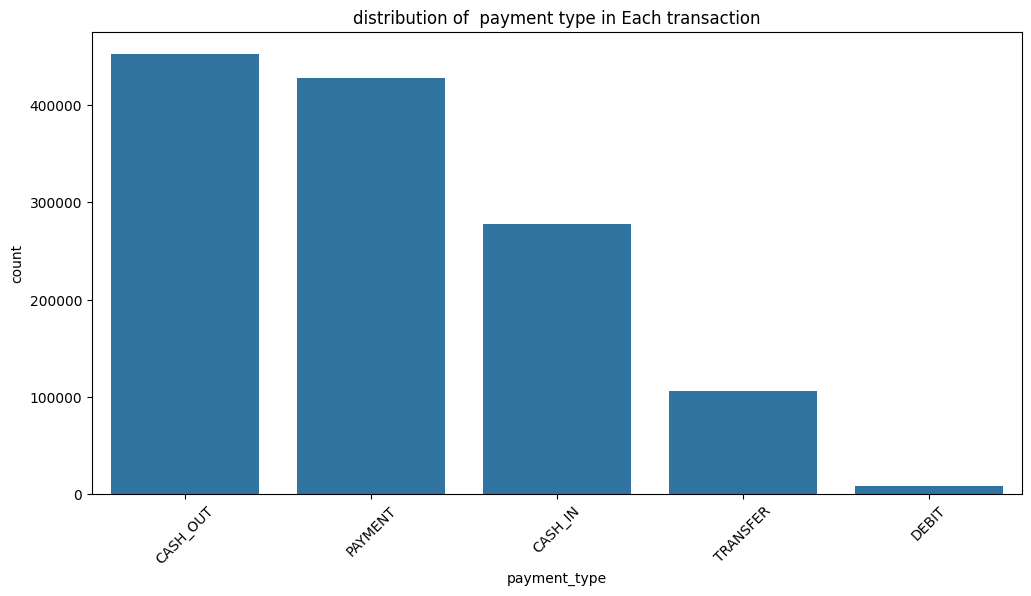

In [21]:

# 1. Bar Plot: Count of movies in each Primary Genre

plt.figure(figsize=(12, 6))
sns.countplot(x='payment_type', data=df_clean, order=df_clean['payment_type'].value_counts().index)
plt.title('distribution of  payment type in Each transaction')
plt.xlabel('payment_type')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()


The bar chart indicates that 'cash out' transactions are the most frequent, while 'debit' transactions are the least common. This helps us understand the patterns of customer transactions."

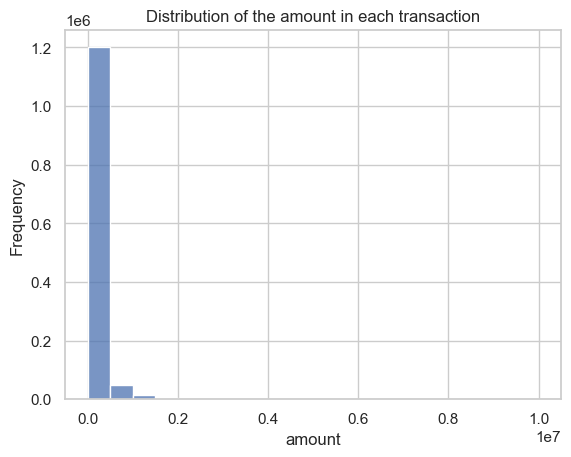

In [22]:
#setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of the amount in each transaction
sns.histplot(data = df_clean, x= "amount", bins = 20,)
plt.xlabel("amount")
plt.ylabel("Frequency")
plt.title('Distribution of the amount in each transaction')
plt.show()


This plot visualizes the distribution of  amounts in the dataset, providing insights into frequency patterns. The visualization enhances clarity in financial analysis, deepening  understanding of transactional dynamics.

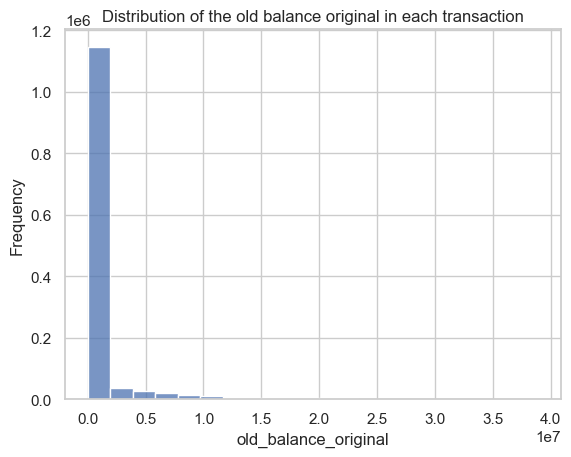

In [23]:
#setting up the aesthetics for the plots
sns.set(style="whitegrid")

 #Distribution of the old balance original in each transaction
sns.histplot(data = df_clean, x= "old_balance_original", bins = 20,)
plt.xlabel("old_balance_original")
plt.ylabel("Frequency")
plt.title('Distribution of the old balance original in each transaction')
plt.show()

This histogram shows the distribution of the old balance original showing us a clear understanding of the insight into frequency patterns.The visualization enhances clarity in financial analysis, deepening  understanding of transactional dynamics.

In [24]:
# make a data frame between the two fraudulent transactions
df_fraud = df_clean[df_clean['isFraud'] == 1]
df_non_fraud = df_clean[df_clean['isFraud'] == 0]

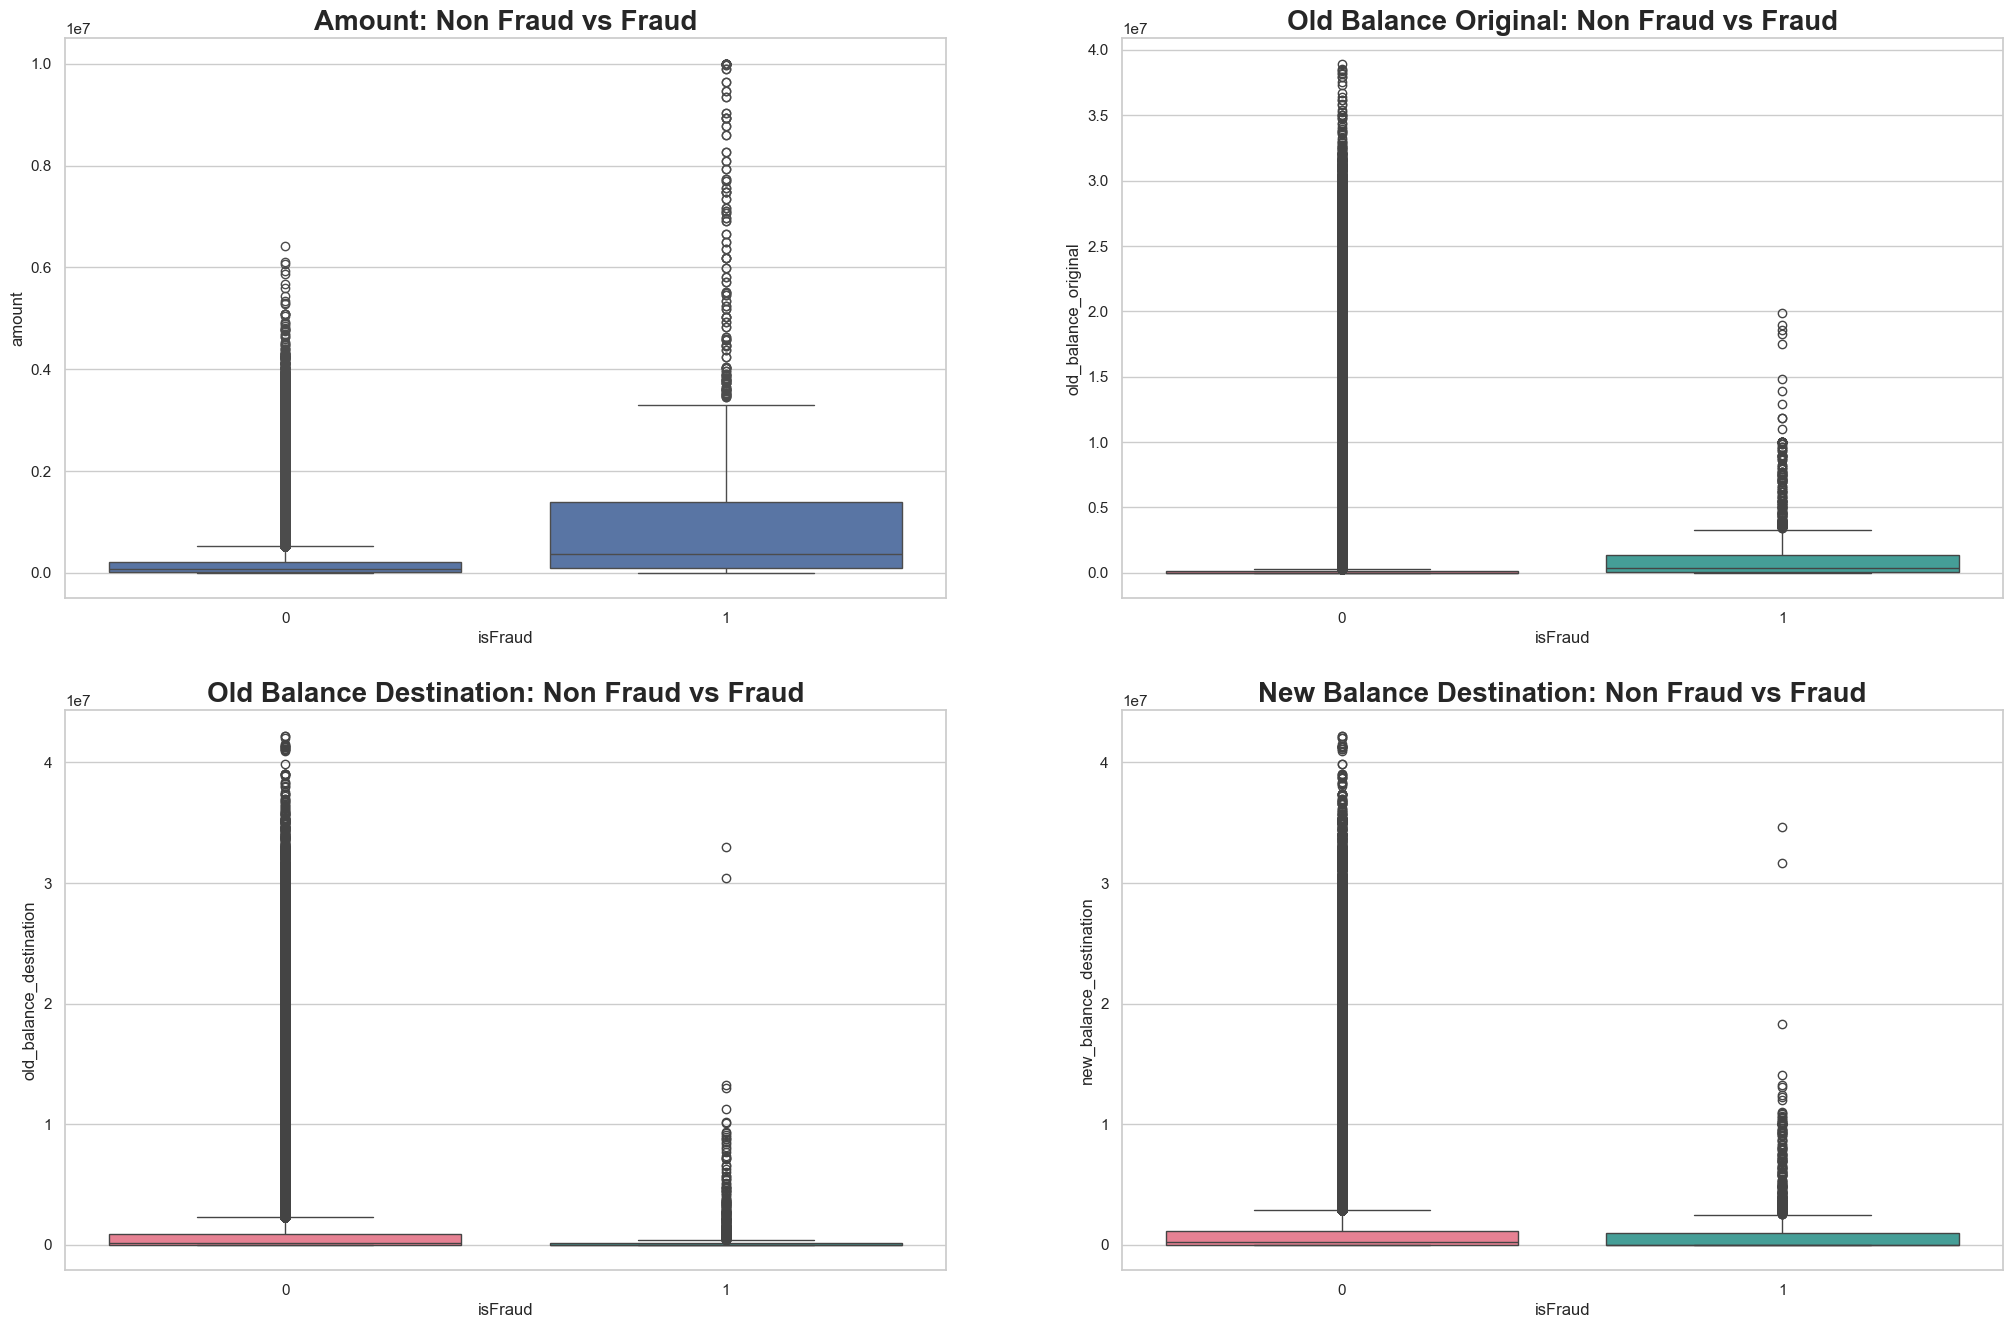

In [25]:


# Set the figure size
plt.figure(figsize=(25, 16))

# Plot 1: amount 
plt.subplot(2, 2, 1)
sns.boxplot(x='isFraud', y='amount', data=df_clean)
plt.title('Amount: Non Fraud vs Fraud', fontweight="bold", size=20)

# Plot 2: old_balance_original
plt.subplot(2, 2, 2)
sns.boxplot(x='isFraud', y='old_balance_original', data=df_clean, palette="husl")
plt.title('Old Balance Original: Non Fraud vs Fraud', fontweight="bold", size=20)

# Plot 3: old_balance_destination
plt.subplot(2, 2, 3)
sns.boxplot(x='isFraud', y='old_balance_destination', data=df_clean, palette='husl')
plt.title('Old Balance Destination: Non Fraud vs Fraud', fontweight="bold", size=20)

# Plot 4: new_balance_destination
plt.subplot(2, 2, 4)
sns.boxplot(x='isFraud', y='new_balance_destination', data=df_clean, palette="husl")
plt.title('New Balance Destination: Non Fraud vs Fraud', fontweight="bold", size=20)

# Show the plots
plt.show()


This box plots  is shown to compares the distribution of each variables which are 'old_balance_destination,' 'old_balance_original,' 'amount,' and 'new_balance_destination' between fraudulent and non-fraudulent transactions.The visualization in this insight made us  to understand the potential patterns to helps us identified the fraudulent cases in the data.

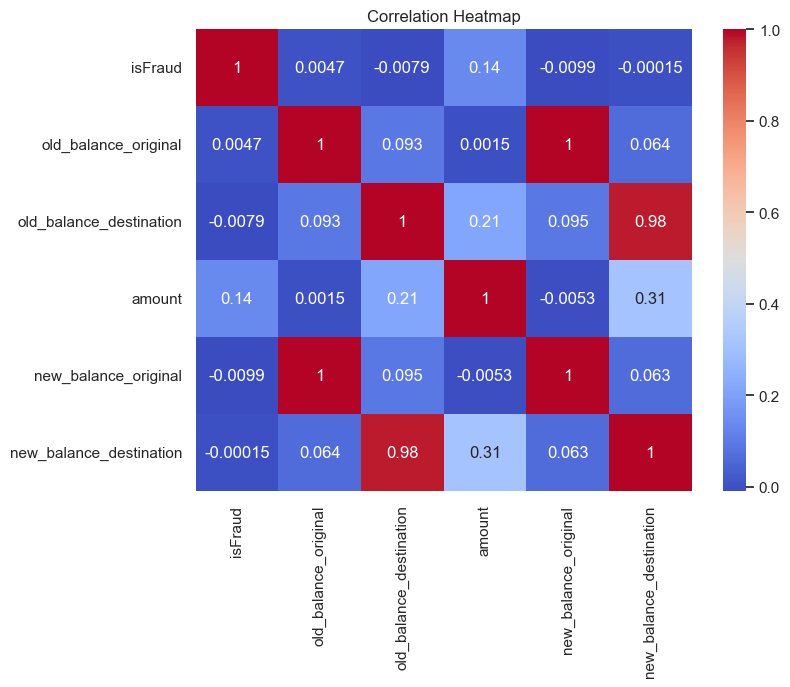

In [26]:
# Heatmap: Correlation between numerical features
correlation_matrix = df_clean[['isFraud', 'old_balance_original','old_balance_destination', 'amount', 'new_balance_original', 'new_balance_destination']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The heatmap demonstrate the correlation between the numerical fetaures in the datadets which include old balance original, old balance destination, amount, new balance destination and the isFraud. This information provide an understanding on the relationship within each factors in the fraudulent transactions in the datasets.

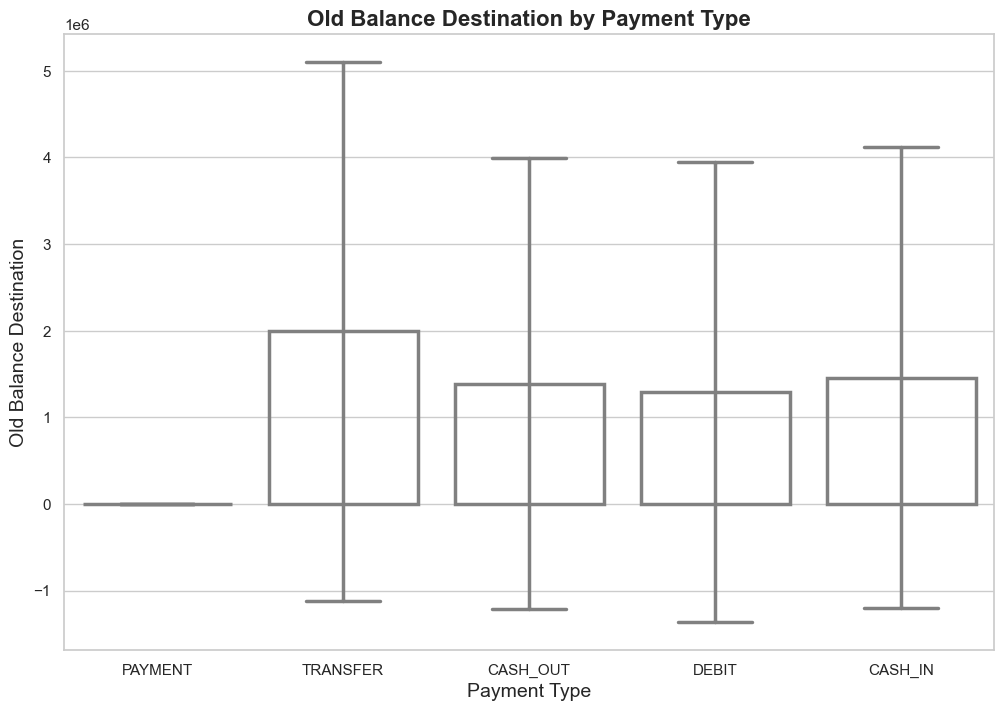

In [27]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Define color palette
palette = sns.color_palette("viridis")

# Plot a bar chart with error bars
sns.barplot(x="payment_type", y="old_balance_destination", data=df_clean, 
            ci="sd", capsize=0.4, errcolor=".5", errwidth=2.5, 
            linewidth=2.5, edgecolor=".5", facecolor=(0, 0, 0, 0), palette=palette)

# Set plot title and labels
plt.title('Old Balance Destination by Payment Type', fontweight="bold", size=16)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Old Balance Destination', fontsize=14)

# Show the plot
plt.show()

This code help us to understand the  visualization information from the bar chart that compares the Old Balance Destination across different 'Payment Types' in the dataset. The chart helps in understanding how the Old Balance Destination differentiate from the payment types. while the error bars provide a positive insight to the data points.

# Fraud Work

In [28]:
fraud_filter = df_clean['isFraud'] == 1
fraud = df_clean[fraud_filter]
fraud.head()

,payment_type,amount,original_owner_id,old_balance_original,new_balance_original,destination_account_id,old_balance_destination,new_balance_destination,isFraud
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
251,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
252,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
680,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1


In [29]:
fraud['amount'].value_counts().reset_index()

,amount,count
0,10000000.00,22
1,181.00,2
2,4094.07,2
3,2498370.12,2
4,8380.79,2
...,...,...
768,994453.20,1
769,42062.82,1
770,1933920.80,1
771,277970.88,1


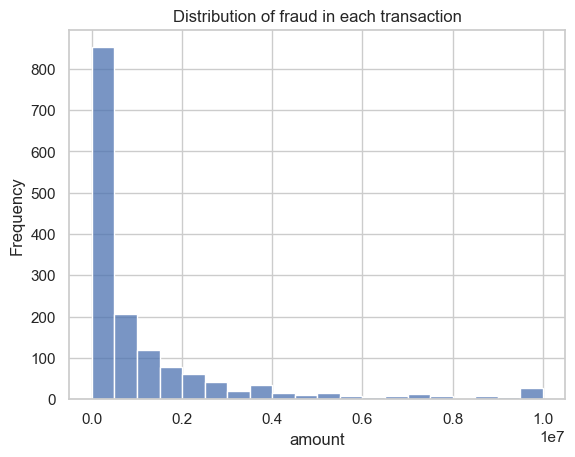

In [30]:
#setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of the old balance original in each transaction
sns.histplot(data =fraud, x= "amount", bins = 20,)
plt.xlabel("amount")
plt.ylabel("Frequency")
plt.title('Distribution of fraud in each transaction')
plt.show()

The histogram on the 'amount' variable in the fraud dataset shows the frequency of occurrences of frauds across different transaction amounts. 

 aiding in the identification of potential patterns or outliers."

<Axes: xlabel='old_balance_destination'>

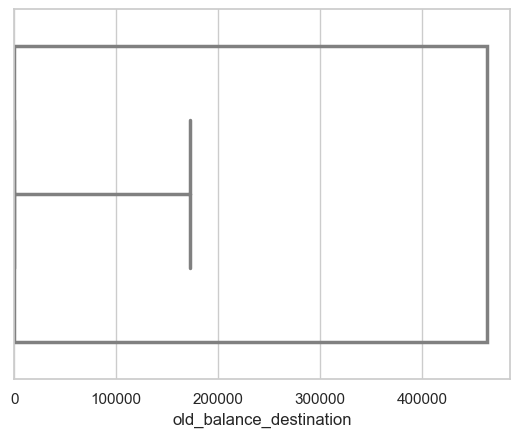

In [31]:
# create a barplot on the old balance destination
sns.barplot( 
fraud, x="old_balance_destination",
errorbar=("pi", 50), capsize=.4,
err_kws={"color": ".5", "linewidth": 2.5},
linewidth=2.5, edgecolor= ".5", facecolor=(0, 0, 0, 0),)

this plot describe  the distribution of the old balance in the destination.The error bars  which indicate errors which was highlighted in the transactions.

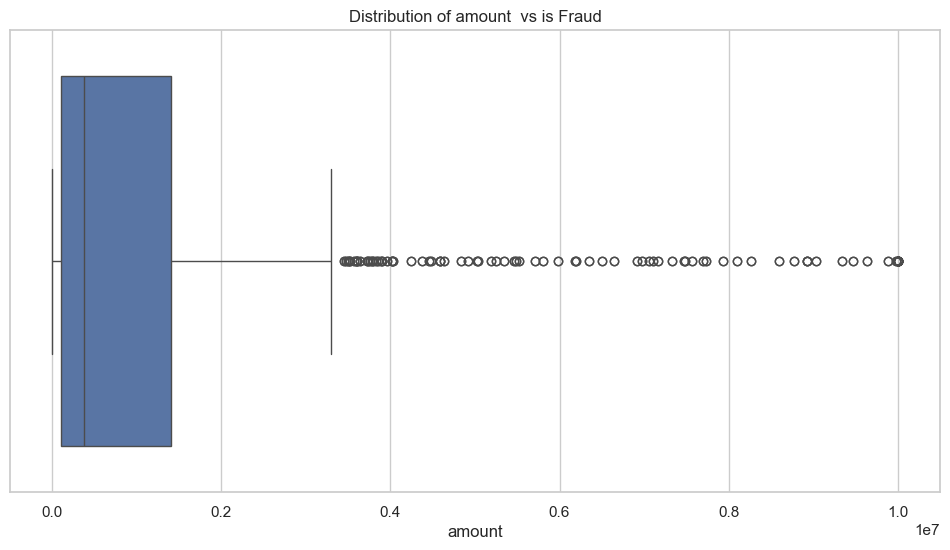

In [32]:
#Distribution of amount  vs is Fraud
plt.figure(figsize=(12, 6))
sns.boxplot(x='amount',  data = fraud)
plt.title('Distribution of amount  vs is Fraud')
plt.xlabel('amount')
plt.show()

This box plot describes the distribution of amounts in the dataset, offering valuable insights into the amounts associated with fraud cases. The visualization illustrates the spread of data on transaction amounts, aiding in the identification of outliers in fraudulent transactions.

# Non Fraud Work

In [33]:
# filter of non fraud cases
non_fraud_filter = df_clean['isFraud'] == 0
non_fraud = df_clean[non_fraud_filter]
non_fraud.head()

,payment_type,amount,original_owner_id,old_balance_original,new_balance_original,destination_account_id,old_balance_destination,new_balance_destination,isFraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
5,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0
6,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0


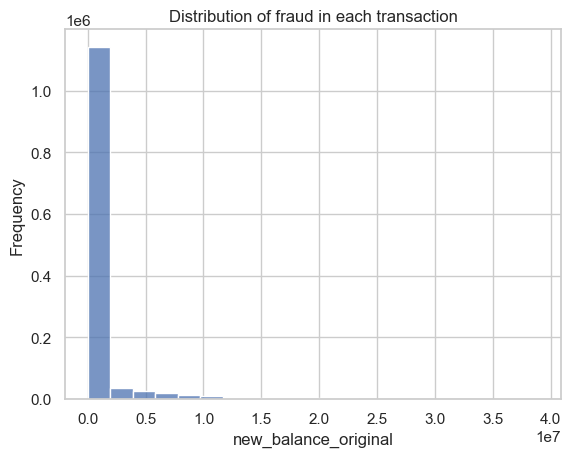

In [34]:
#setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of the new balance original in each transaction
sns.histplot(data = non_fraud, x= "new_balance_original", bins = 20,)
plt.xlabel("new_balance_original")
plt.ylabel("Frequency")
plt.title('Distribution of fraud in each transaction')
plt.show()

The histogram on the 'new balance original' variable in the fraud dataset shows the frequency of occurrences of frauds across different transaction amounts. The histogram provide a better understanding of the transaction that was made on the non fraud transactions. 

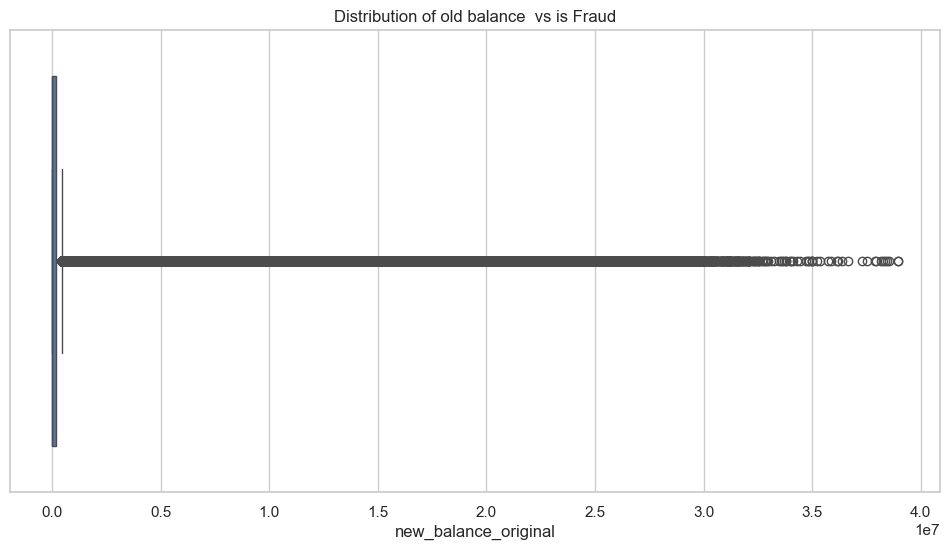

In [35]:
#Distribution of old balance destination  vs is Fraud
# this plot provides an insight to the outlier of the old balance destination
plt.figure(figsize=(12, 6))
sns.boxplot(x='new_balance_original', data = non_fraud)
plt.title('Distribution of old balance  vs is Fraud')
plt.show()


This plot displays the distribution of the "new_balance_original" variable in non-fraudulent transactions through a boxplot. It provides insights into outliers associated with the old balance destination in non-fraud cases. These outliers indicate that the spread of the data extends beyond the typical range.

# remove outlines 
# save clean data

# Detect remove outliers

<Axes: xlabel='amount', ylabel='Count'>

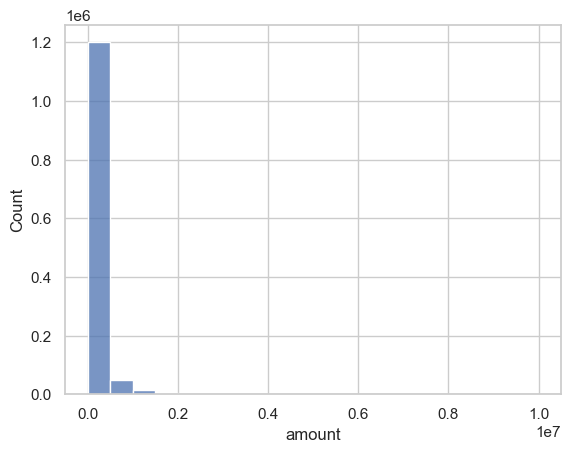

In [85]:
sns.histplot(data = df_clean, x= "amount", bins = 20,)

In [86]:
#finding IQR
percentile25=df_clean['amount'].quantile(0.25)
percentile75=df_clean['amount'].quantile(0.75)
print(percentile25)
print(percentile75)

12802.97
218324.2525


In [87]:
iqr=percentile75-percentile25
iqr

205521.2825

In [88]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 526606.17625
Lower limit -295478.95375000004


In [89]:
df_remove_outlier = df_clean[(df_clean['amount'] < upper_limit)] 

<Axes: xlabel='amount', ylabel='Count'>

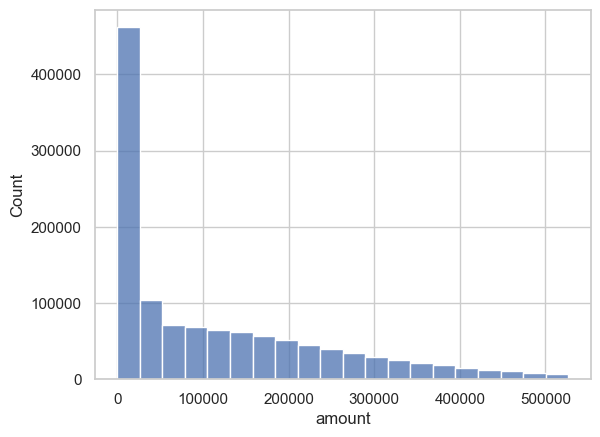

In [90]:
sns.histplot(data = df_remove_outlier, x= "amount", bins = 20,)

**remove outlier for old balance org**

<Axes: xlabel='old_balance_original', ylabel='Count'>

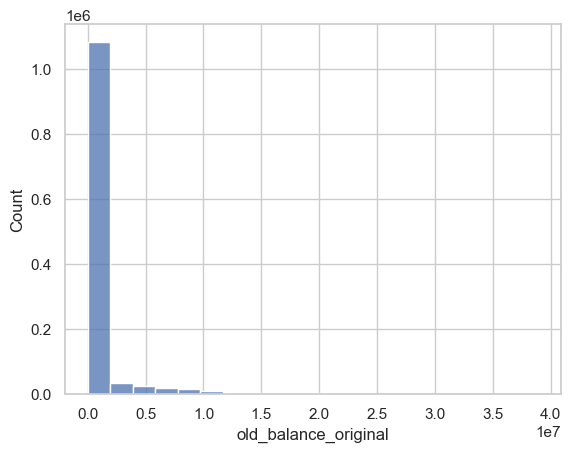

In [91]:
sns.histplot(data = df_remove_outlier, 
             x= "old_balance_original", 
             bins = 20)

In [92]:
#finding IQR
percentile25=df_remove_outlier['old_balance_original'].quantile(0.25)
percentile75=df_remove_outlier['old_balance_original'].quantile(0.75)
print('percentile25:',percentile25,'percentile75:', percentile75)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit",lower_limit,"; Upper limit",upper_limit)

percentile25: 0.0 percentile75: 139903.99
Lower limit -308281.92375 ; Upper limit 448185.91375


In [93]:
df_remove_outlier = df_remove_outlier[(df_remove_outlier['old_balance_original'] > upper_limit)] 

<Axes: xlabel='old_balance_original', ylabel='Count'>

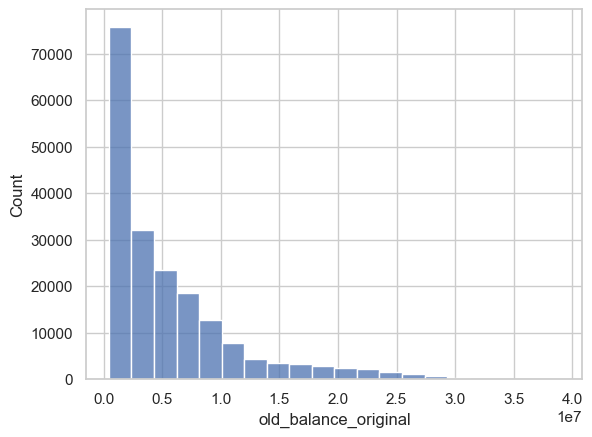

In [94]:
sns.histplot(data = df_remove_outlier, x= "old_balance_original", bins = 20,)

In [95]:
df_remove_outlier.shape

(192184, 9)

In [96]:
# from pathlib import Path
# output_file = '../data/processed/PS_20174392719_1491204439457_log_0.csv'
# output_dir = Path('../data/processed')
# output_dir.mkdir(parents=True, exist_ok=True)
# df_remove_outlier.to_csv(output_file)  # can join path elements with / operator

In [97]:
df_remove_outlier.to_csv("../../data/processed/fraud_clean.csv")

,payment_type,amount,original_owner_id,old_balance_original,new_balance_original,destination_account_id,old_balance_destination,new_balance_destination,isFraud
14,PAYMENT,4098.78,C1026483832,503264.00,499165.22,M1635378213,0.00,0.00,0
62,DEBIT,8727.74,C166694583,882770.00,874042.26,C1129670968,12636.00,0.00,0
63,PAYMENT,2599.46,C885910946,874042.26,871442.79,M1860591867,0.00,0.00,0
241,PAYMENT,4635.18,C1110698130,6313782.05,6309146.87,M125644421,0.00,0.00,0
242,PAYMENT,1267.97,C1053632127,6309146.87,6307878.90,M1493158871,0.00,0.00,0
